In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec 
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns 

In [2]:
sns.set()

In [3]:
matplotlib.rcParams['axes.titlesize'] = 14
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.labelpad'] = 8
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14

In [4]:
def make_dot_data(points_per_side=20):
  np.random.seed(42)
  left_data = np.random.uniform(-5, 0, points_per_side)
  right_data = np.random.uniform(0.01, 5, points_per_side)
  dot_X = np.ravel([left_data, right_data])
  dot_y = np.ravel([[0]*points_per_side, [1]*points_per_side])
  return (dot_X, dot_y)

In [5]:
def draw_dot_data(ax, dot_X, dot_y, y_val):
  cm = matplotlib.colors.LinearSegmentedColormap.from_list('mymap', ['#1C5BA8', '#D6A234'])
  x_min = np.min(dot_X) - 1
  x_max = np.max(dot_X) + 1
  plt.plot([x_min, x_max], [y_val, y_val], color='black', linewidth=2, zorder=10)
  plt.scatter(dot_X, [y_val]*len(dot_X), cmap=cm, linewidths=2, s=80, c=dot_y, zorder=20)

In [6]:
def draw_dot_data_figure(dot_X, dot_y):
  fig = plt.figure(figsize=(8, 1))
  ax = plt.gca()
  draw_dot_data(ax, dot_X, dot_y, 0)
  plt.ylim(-0.01, 0.01)
  plt.xlim(np.min(dot_X)-.5, np.max(dot_X)+.5)
  plt.yticks([0])
  plt.show()
  plt.savefig('dot-data')

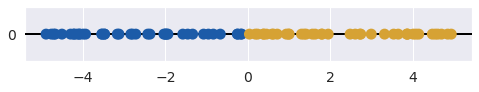

<Figure size 432x288 with 0 Axes>

In [7]:
(dot_X, dot_y) = make_dot_data(points_per_side=40)
draw_dot_data_figure(dot_X, dot_y)

In [8]:
from scipy.signal import savgol_filter 

In [38]:
def draw_dot_data_curve(ax, dot_X, dot_y, smooth=False):
    val_list = np.linspace(np.min(dot_X)-1, np.max(dot_X)+1, 200)
    yvals = []
    for v in val_list:
        total_error = 0
        for x,y in zip(dot_X, dot_y):
            if ((x < v) and (y == 1)) or ((x > v) and (y == 0)):
                    total_error += 1
        yvals.append(total_error)
    yrange = (np.min(yvals), np.max(yvals))
    if smooth:
        yvals = savgol_filter(yvals, 51, 3) 
    yvals = np.interp(yvals, (np.min(yvals), np.max(yvals)), (0,1))
    ax.plot(val_list, yvals)
    return yrange

In [45]:
def draw_dot_data_and_curve(dot_X, dot_y, smooth=False):
    ax = plt.gca()
    (ymin, ymax) = draw_dot_data_curve(ax, dot_X, dot_y, smooth)
    plt.ylim(-.5, 1.1)
    draw_dot_data(ax, dot_X, dot_y, -.25)
    plt.xlim(np.min(dot_X)-.5, np.max(dot_X)+.5)
    plt.yticks([0, 1.1],(ymin, ymax))
    plt.ylabel('error')
    plt.xlabel('dividing point position')
    if smooth:
      plt.savefig('error-curve-smooth')
    else:
      plt.savefig('error-curve-non-smooth')
    plt.show()

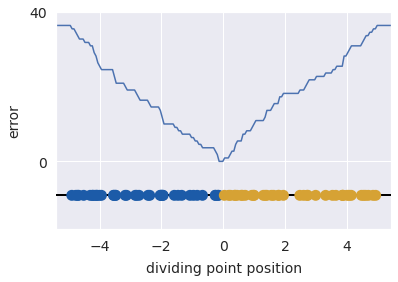

In [46]:
draw_dot_data_and_curve(dot_X, dot_y, smooth=False)

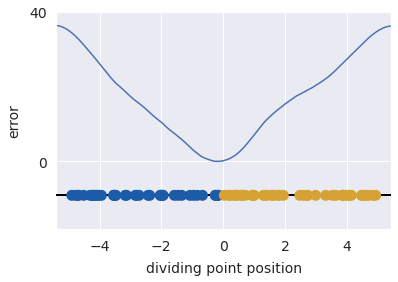

In [47]:
draw_dot_data_and_curve(dot_X, dot_y, smooth=True)